# BASE

In [1]:
import Olds.func as func
import math
file_path = 'E-n23-k3.evrp'  # Change this to your file path
evrp_data = func.read_evrp_file(file_path)
evrp_data

{'COMMENT': 'Modificatification of E-n23-k3 instance. Modified by Mavrovouniotis Menelaou.',
 'OPTIMAL_VALUE': 573.130948,
 'VEHICLES': 3,
 'DIMENSION': 23,
 'STATIONS': 9,
 'CAPACITY': 4500,
 'ENERGY_CAPACITY': 190.0,
 'ENERGY_CONSUMPTION': 1.2,
 'NODE_COORD_SECTION': {1: (266.0, 235.0),
  2: (295.0, 272.0),
  3: (301.0, 258.0),
  4: (309.0, 260.0),
  5: (217.0, 274.0),
  6: (218.0, 278.0),
  7: (282.0, 267.0),
  8: (242.0, 249.0),
  9: (230.0, 262.0),
  10: (249.0, 268.0),
  11: (256.0, 267.0),
  12: (265.0, 257.0),
  13: (267.0, 242.0),
  14: (259.0, 265.0),
  15: (315.0, 233.0),
  16: (329.0, 252.0),
  17: (318.0, 252.0),
  18: (329.0, 224.0),
  19: (267.0, 213.0),
  20: (275.0, 192.0),
  21: (303.0, 201.0),
  22: (208.0, 217.0),
  23: (326.0, 181.0),
  24: (229.0, 198.0),
  25: (229.0, 230.0),
  26: (229.0, 262.0),
  27: (269.0, 198.0),
  28: (269.0, 230.0),
  29: (269.0, 262.0),
  30: (309.0, 198.0),
  31: (309.0, 230.0),
  32: (309.0, 262.0)},
 'DEMAND_SECTION': {1: 0,
  2: 125,

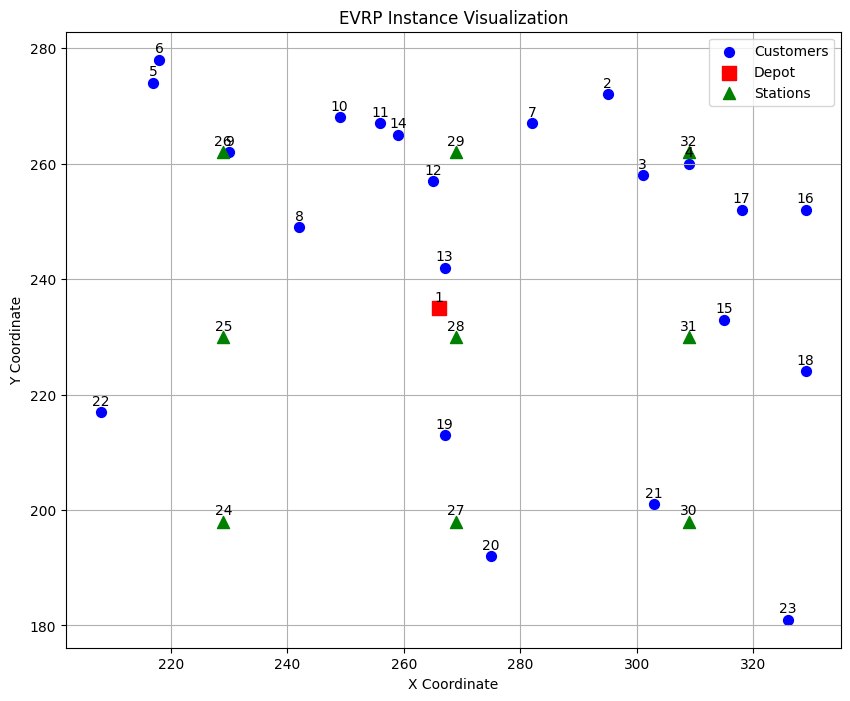

In [2]:
func.plot_evrp_instance(evrp_data)

Rota Gerada: [ 1 16 22  3 11 10 17 19 23  1 12  2  5  7 21  9 13  1  8  4 20 15 14 18
  6  1]
Cromossomo da rota: [0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0
 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0
 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0]
Distância total percorrida: 1603.67


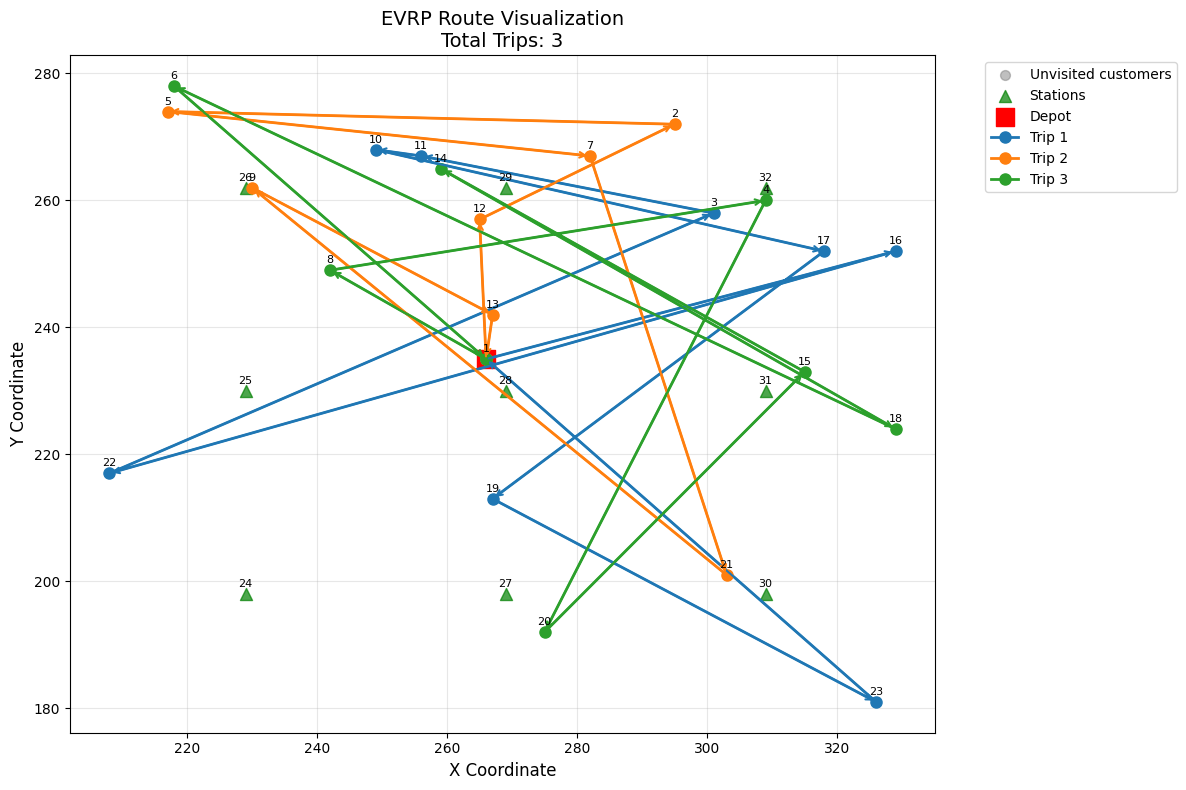

In [4]:
import numpy as np
rot = func.criar_rotas_aleatorias(evrp_data, num_rotas_min = 3, estacao=False)
val = func.validar_rota(rot, evrp_data, 3, False)
cod = func.codificar_rota_binaria(rot, evrp_data)
dec = rota_decodificada = func.decodificar_rota_binaria(cod, evrp_data)
dis = func.calcular_distancia_total(evrp_data, rot)

if not val:
    print("Rota Invalida")
elif not np.array_equal(rot, dec):
    print("Processo de cod/dec falhou")
else:
    print(f"Rota Gerada: {rot}")
    print(f"Cromossomo da rota: {cod}")
    print(f"Distância total percorrida: {dis:.2f}")
    func.plot_single_route_with_trips(evrp_data, rot)

# GA


Ordem de Execução no GA
1. **Inicialização**: Gere a população inicial.
2. **Avaliação**: Calcule a distância total de cada rota.
3. **Seleção**: Escolha os pais para reprodução.
4. **Recombinação**: Aplique crossover nos pais selecionados.
5. **Mutação**: Introduza variações nos filhos.
6. **Substituição**: Atualize a população com os melhores indivíduos.
7. **Repita**: Volte para a etapa 2 até atingir o critério de parada.

Métodos Recomendados para Seu Caso
1. **Seleção**: Torneio Binário (simplicidade) ou Roleta (diversidade).
2. **Crossover**: Uniforme (para binário) ou One-Point (com reparo pós-crossover).
3. **Mutação**: Bit-Flip Controlado (respeitando a codificação do depósito).
4. **Substituição**: Elitismo (preserva as melhores rotas).

In [6]:
import random
clientes = evrp_data['DIMENSION']-1

#Cerca de 30-50% da população 
#1.5x a 2x o número de pais

n_pop = 50                # Tamanho da população
n_pais = 20               # 40% da população
n_filhos = 45             # 90% da população (com elitismo=5)
elitismo = 5              # Mantém os 5 melhores a cada geração
taxa_mutacao = 0.1        # 10% de chance de mutação por indivíduo
taxa_crossover = 0.8      # 80% de chance de crossover por par de pais

## 1. Inicialização
Objetivo: Gerar soluções iniciais viáveis.

Método Único: Gerar Rotas

In [7]:
clientes = evrp_data['DIMENSION']-1
populacao = [func.criar_rotas_aleatorias(evrp_data, num_rotas_min=3, estacao=False) for _ in range(n_pop)]
rota_ex = populacao[0]
rota_ex

array([ 1, 12,  4, 11,  9,  1, 14,  7,  2, 13,  1,  8, 19, 20,  6,  1,  3,
       17, 23, 18,  1, 22, 16, 10,  1, 15, 21,  5,  1])

## 2. Avaliação (Fitness)

Objetivo: Medir a qualidade de cada rota.

In [8]:
import math

def avaliacao_distancia_pura(populacao, data):
    """
    Calcula fitness como o inverso da distância total percorrida.
    - Quanto menor a distância, maior o fitness.
    - Retorna: {rota_tuple: fitness}
    """
    fitness = {}
    for rota in populacao:
        rota_tuple = tuple(int(node) for node in rota)
        distancia_total = 0.0
        for i in range(len(rota) - 1):
            x1, y1 = data['NODE_COORD_SECTION'][rota[i]]
            x2, y2 = data['NODE_COORD_SECTION'][rota[i + 1]]
            distancia_total += math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        fitness[rota_tuple] = 1 / (distancia_total + 1e-6)  # +1e-6 evita divisão por zero
    return fitness

In [9]:
def avaliacao_distancia_restricoes(populacao, data):
    """
    Calcula fitness considerando distância + penalidades fictícias.
    - Restrições simuladas (sem implementação real ainda):
      - Capacidade máxima (CAPACITY)
      - Bateria mínima (ENERGY_CAPACITY)
    - Retorna: {rota_tuple: fitness}
    """
    fitness = {}
    for rota in populacao:
        rota_tuple = tuple(int(node) for node in rota)
        distancia_total = 0.0
        penalidade = 0.0
        
        # Cálculo da distância
        for i in range(len(rota) - 1):
            x1, y1 = data['NODE_COORD_SECTION'][rota[i]]
            x2, y2 = data['NODE_COORD_SECTION'][rota[i + 1]]
            distancia_total += math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        
        # Penalidades fictícias (exemplo)
        if 'CAPACITY' in data:
            demanda_total = sum(data['DEMAND_SECTION'].get(node, 0) for node in rota)
            if demanda_total > data['CAPACITY']:
                penalidade += 1000  # Penalidade alta por excesso de carga
        
        fitness[rota_tuple] = 1 / (distancia_total + penalidade + 1e-6)
    return fitness

In [10]:
def avaliacao_rankeamento(populacao, data):
    """
    Calcula fitness baseado na posição no ranking de distâncias.
    - Rotas mais curtas têm fitness proporcional ao quadrado do ranking.
    - Retorna: {rota_tuple: fitness}
    """
    distancias = {}
    for rota in populacao:
        rota_tuple = tuple(int(node) for node in rota)
        distancia_total = 0.0
        for i in range(len(rota) - 1):
            x1, y1 = data['NODE_COORD_SECTION'][rota[i]]
            x2, y2 = data['NODE_COORD_SECTION'][rota[i + 1]]
            distancia_total += math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        distancias[rota_tuple] = distancia_total
    
    # Ordena rotas pela distância (menor = melhor)
    rotas_ordenadas = sorted(distancias.keys(), key=lambda x: distancias[x])
    
    # Atribui fitness baseado no ranking (melhor rank = maior fitness)
    fitness = {}
    for rank, rota in enumerate(rotas_ordenadas):
        fitness[rota] = (len(rotas_ordenadas) - rank) ** 2  # Quadrado do ranking inverso
    
    # Normaliza para somar 1 (opcional)
    total = sum(fitness.values())
    if total > 0:
        fitness = {rota: val / total for rota, val in fitness.items()}
    
    return fitness

In [11]:
print("Distância Direta:", avaliacao_distancia_pura(populacao, evrp_data))
print("Penalização:", avaliacao_distancia_restricoes(populacao, evrp_data))
print("Rankeamento:", avaliacao_rankeamento(populacao, evrp_data))

fitness = avaliacao_rankeamento(populacao, evrp_data)

Distância Direta: {(1, 12, 4, 11, 9, 1, 14, 7, 2, 13, 1, 8, 19, 20, 6, 1, 3, 17, 23, 18, 1, 22, 16, 10, 1, 15, 21, 5, 1): 0.0007293131450677497, (1, 22, 5, 18, 16, 1, 15, 12, 23, 3, 1, 7, 4, 11, 13, 1, 8, 10, 9, 17, 1, 6, 14, 21, 1, 19, 20, 2, 1): 0.000698704425099749, (1, 5, 15, 21, 4, 1, 9, 10, 17, 16, 1, 18, 19, 3, 13, 1, 7, 12, 2, 20, 1, 11, 8, 14, 1, 23, 22, 6, 1): 0.0007100660780984198, (1, 22, 21, 16, 19, 4, 14, 20, 12, 1, 8, 2, 13, 9, 6, 18, 17, 1, 10, 11, 5, 7, 23, 3, 15, 1): 0.0007327670558420735, (1, 3, 7, 8, 19, 1, 6, 17, 22, 12, 1, 10, 16, 5, 18, 1, 2, 4, 13, 14, 1, 20, 11, 9, 1, 15, 23, 21, 1): 0.0006627201270561735, (1, 16, 7, 9, 14, 1, 4, 12, 3, 15, 1, 5, 23, 20, 2, 1, 13, 21, 10, 22, 1, 18, 17, 19, 1, 8, 6, 11, 1): 0.0007069535297428549, (1, 18, 15, 13, 22, 10, 14, 5, 2, 1, 12, 9, 23, 3, 4, 6, 8, 1, 11, 16, 21, 20, 19, 7, 17, 1): 0.0008099205210516587, (1, 16, 3, 10, 21, 7, 9, 1, 4, 5, 23, 15, 12, 18, 1, 22, 20, 13, 14, 6, 1, 2, 8, 19, 11, 17, 1): 0.0006381810047136007

## 3. Seleção de Pais

Objetivo: Escolher os melhores indivíduos para reprodução.

In [12]:
import numpy as np

def selecao_roleta(populacao, fitness, n_pais):
    """
    Seleciona pais proporcionalmente ao seu fitness.
    
    Args:
        populacao: Lista de indivíduos (rotas).
        fitness: Dicionário {rota: valor_fitness}.
        n_pais: Número de pais a selecionar.
    
    Returns:
        Lista com os pais selecionados.
    """
    rotas = list(fitness.keys())
    valores_fitness = np.array([fitness[rota] for rota in rotas])
    probabilidades = valores_fitness / valores_fitness.sum()
    
    # Seleciona índices ao invés de rotas diretamente
    indices_selecionados = np.random.choice(
        len(rotas), 
        size=n_pais, 
        p=probabilidades,
        replace=True
    )
    
    return [populacao[i] for i in indices_selecionados]

In [13]:
def selecao_torneio(populacao, fitness, n_pais, tamanho_torneio=2):
    """
    Seleciona pais através de torneios entre indivíduos aleatórios.
    
    Args:
        tamanho_torneio: Número de indivíduos que competem em cada torneio.
    """
    pais_selecionados = []
    indices = list(range(len(populacao)))  # Trabalhamos com índices
    
    for _ in range(n_pais):
        # Seleciona índices dos competidores
        competidores_idx = np.random.choice(indices, size=tamanho_torneio, replace=False)
        
        # Encontra o vencedor pelo fitness máximo
        vencedor_idx = max(competidores_idx, key=lambda i: fitness[tuple(populacao[i])])
        pais_selecionados.append(populacao[vencedor_idx])
    
    return pais_selecionados

In [14]:
def selecao_rank(populacao, fitness, n_pais):
    """
    Seleciona pais baseado no ranking (não no valor absoluto do fitness).
    """
    # Ordena a população pelo fitness (do melhor para o pior)
    indices_ordenados = sorted(
        range(len(populacao)), 
        key=lambda i: fitness[tuple(populacao[i])], 
        reverse=True
    )
    
    pesos = np.arange(len(populacao), 0, -1)
    probabilidades = pesos / pesos.sum()
    
    indices_selecionados = np.random.choice(
        indices_ordenados,
        size=n_pais,
        p=probabilidades,
        replace=True
    )
    
    return [populacao[i] for i in indices_selecionados]

In [15]:
def elitismo(populacao, fitness, n_elite):
    """
    Seleciona os n_elite melhores indivíduos diretamente.
    """
    # Ordena pelo fitness (melhor primeiro)
    indices_ordenados = sorted(
        range(len(populacao)), 
        key=lambda i: fitness[tuple(populacao[i])], 
        reverse=True
    )
    return [populacao[i] for i in indices_ordenados[:n_elite]]

In [16]:
# Selecionando pais
pais_roleta = selecao_roleta(populacao, fitness, n_pais=10)
pais_torneio = selecao_torneio(populacao, fitness, n_pais=10)
pais_rank = selecao_rank(populacao, fitness, n_pais=10)
pais_elite = elitismo(populacao, fitness, n_elite=2)  # Normalmente usado em combinação com outros métodos

print("Roleta:", pais_roleta)
print("Torneio:", pais_torneio)
print("Rankeamento:", pais_rank)
print("Elitimso:", pais_elite)

pais = pais_rank

Roleta: [array([ 1, 20, 19, 10,  9,  8,  1,  7,  3, 23, 14,  5,  1,  2,  6, 16, 22,
        1, 15, 18,  4, 13,  1, 17, 12, 21, 11,  1]), array([ 1, 22, 21, 16, 19,  4, 14, 20, 12,  1,  8,  2, 13,  9,  6, 18, 17,
        1, 10, 11,  5,  7, 23,  3, 15,  1]), array([ 1, 18,  2,  3, 15,  5,  7,  1,  6, 13, 20, 21,  4, 16,  1, 23, 11,
       12, 22, 19,  1, 10, 17,  9, 14,  8,  1]), array([ 1,  7, 13, 18,  2,  4, 20,  1, 22,  3,  9, 11,  8, 10,  1, 21, 17,
       16, 19, 23,  1, 12,  5, 14, 15,  6,  1]), array([ 1, 12, 11, 15, 14, 18,  1, 22,  2,  9, 23, 10,  1, 21, 17,  8, 13,
        1,  6,  7,  4,  3,  1,  5, 19, 20, 16,  1]), array([ 1, 22, 21, 16, 19,  4, 14, 20, 12,  1,  8,  2, 13,  9,  6, 18, 17,
        1, 10, 11,  5,  7, 23,  3, 15,  1]), array([ 1, 12,  4, 11,  9,  1, 14,  7,  2, 13,  1,  8, 19, 20,  6,  1,  3,
       17, 23, 18,  1, 22, 16, 10,  1, 15, 21,  5,  1]), array([ 1,  2,  3,  7, 13, 19,  9,  1,  4, 23, 22,  5, 21, 18,  1, 20,  6,
       14,  8, 16,  1, 17, 11, 10, 12, 1

## 4. Recombinação (Crossover)

Objetivo: Combinar partes de dois pais para gerar filhos.

In [17]:
import numpy as np
from copy import deepcopy

def crossover_binario(pai1_bin, pai2_bin, tipo='one_point', taxa_crossover=1):
    """
    Realiza crossover entre dois cromossomos binários.
    Retorna dois filhos.
    """
    if np.random.rand() > taxa_crossover:
        return deepcopy(pai1_bin), deepcopy(pai2_bin)
    
    size = len(pai1_bin)
    
    if tipo == 'one_point':
        point = np.random.randint(1, size-1)
        filho1 = np.concatenate([pai1_bin[:point], pai2_bin[point:]])
        filho2 = np.concatenate([pai2_bin[:point], pai1_bin[point:]])
    
    elif tipo == 'two_point':
        point1, point2 = sorted(np.random.choice(range(1, size), size=2, replace=False))
        filho1 = np.concatenate([pai1_bin[:point1], pai2_bin[point1:point2], pai1_bin[point2:]])
        filho2 = np.concatenate([pai2_bin[:point1], pai1_bin[point1:point2], pai2_bin[point2:]])
    
    elif tipo == 'uniforme':
        mask = np.random.randint(0, 2, size=size).astype(bool)
        filho1 = np.where(mask, pai1_bin, pai2_bin)
        filho2 = np.where(mask, pai2_bin, pai1_bin)
    return filho1, filho2

In [18]:
def reparar_filho(filho, pai, evrp_data, num_rotas_min=3, estacao=False):
    """
    Corrige uma rota filho com base no pai para atender às restrições do EVRP.
    
    Args:
        filho: Rota filho a ser reparada (array numpy).
        pai: Rota pai usada como referência (array numpy).
        evrp_data: Dicionário com dados do problema.
        num_rotas_min: Número mínimo de rotas exigido.
        estacao: Se True, inclui estações de recarga como nós válidos.
    
    Returns:
        Rota filho reparada (array numpy).
    """
    # Converte para lista para facilitar manipulação
    filho_list = filho.tolist()
    pai_list = pai.tolist()
    
    # 1. Garante que começa e termina com 1
    if filho_list[0] != 1:
        filho_list.insert(0, 1)
    if filho_list[-1] != 1:
        filho_list.append(1)
    
    # 2. Remove 1s consecutivos (rotas vazias)
    i = 1
    while i < len(filho_list) - 1:
        if filho_list[i] == 1 and filho_list[i+1] == 1:
            filho_list.pop(i)
        else:
            i += 1
    
    # 3. Identifica elementos válidos e clientes faltantes
    dimension = evrp_data['DIMENSION']
    clientes_validos = set(range(2, dimension + 1))
    estacoes_validas = set(evrp_data['STATIONS_COORD_SECTION']) if estacao else set()
    elementos_validos = clientes_validos.union(estacoes_validas)
    
    # 4. Remove clientes inválidos (0, IDs maiores que DIMENSION)
    clientes_presentes = []
    for node in filho_list[1:-1]:  # Ignora o primeiro e último 1
        if node in elementos_validos:
            clientes_presentes.append(node)
    
    # 5. Remove duplicatas mantendo a ordem de primeira ocorrência
    clientes_unicos = []
    seen = set()
    for node in clientes_presentes:
        if node not in seen:
            seen.add(node)
            clientes_unicos.append(node)
    
    # 6. Completa com clientes faltantes do pai (se necessário)
    if not estacao:  # Só aplica se não estiver usando estações
        clientes_faltantes = list(clientes_validos - set(clientes_unicos))
        # Adiciona clientes faltantes do pai que não estão no filho
        for node in pai_list[1:-1]:
            if node in clientes_faltantes and node not in clientes_unicos:
                clientes_unicos.append(node)
                clientes_faltantes.remove(node)
    
    # 7. Reconstroi a rota com os clientes válidos
    # Divide em rotas baseado nos 1s do pai (estrutura herdada)
    rotas_pai = []
    current_route = []
    for node in pai_list[1:-1]:  # Ignora o primeiro e último 1
        if node == 1:
            if current_route:
                rotas_pai.append(current_route)
                current_route = []
        else:
            current_route.append(node)
    if current_route:
        rotas_pai.append(current_route)
    
    # Distribui os clientes válidos nas rotas do pai
    filho_reparado = [1]
    clientes_alocados = 0
    
    for rota_pai in rotas_pai:
        if not clientes_unicos:
            break
            
        # Pega os clientes necessários para esta rota
        num_clientes_rota = min(len(rota_pai), len(clientes_unicos) - clientes_alocados)
        rota_filho = clientes_unicos[clientes_alocados:clientes_alocados + num_clientes_rota]
        filho_reparado.extend(rota_filho)
        filho_reparado.append(1)
        clientes_alocados += num_clientes_rota
    
    # Adiciona clientes restantes (se houver) em novas rotas
    while clientes_alocados < len(clientes_unicos):
        num_restante = len(clientes_unicos) - clientes_alocados
        rota_filho = clientes_unicos[clientes_alocados:clientes_alocados + min(num_restante, 10)]  # Máx 10 clientes por rota
        filho_reparado.extend(rota_filho)
        filho_reparado.append(1)
        clientes_alocados += len(rota_filho)
    
    # 8. Garante número mínimo de rotas
    num_rotas = filho_reparado.count(1) - 1
    if num_rotas < num_rotas_min:
        # Divide a maior rota em duas para aumentar o número de rotas
        rotas = []
        current = []
        for node in filho_reparado:
            if node == 1:
                if current:
                    rotas.append(current)
                    current = []
            else:
                current.append(node)
        
        while len(rotas) < num_rotas_min and len(rotas) > 0:
            # Encontra a rota mais longa
            maior_rota_idx = max(range(len(rotas)), key=lambda i: len(rotas[i]))
            maior_rota = rotas[maior_rota_idx]
            
            if len(maior_rota) >= 2:
                # Divide no meio
                meio = len(maior_rota) // 2
                nova_rota1 = maior_rota[:meio]
                nova_rota2 = maior_rota[meio:]
                
                # Substitui a rota original pelas duas novas
                rotas.pop(maior_rota_idx)
                rotas.insert(maior_rota_idx, nova_rota1)
                rotas.insert(maior_rota_idx + 1, nova_rota2)
        
        # Reconstrói o filho
        filho_reparado = [1]
        for rota in rotas:
            filho_reparado.extend(rota)
            filho_reparado.append(1)
    
    return np.array(filho_reparado)

In [19]:
def crossover_completo(pais, evrp_data, num_rotas_min=3, tipo_crossover='one_point', taxa_crossover=0.8, estacao=False):
    """
    Executa o crossover completo entre pares de pais, incluindo reparo dos filhos.
    
    Args:
        pais: Lista de rotas pais (cada rota é um array numpy).
        evrp_data: Dicionário com dados do problema EVRP.
        num_rotas_min: Número mínimo de rotas exigido.
        tipo_crossover: Tipo de crossover ('one_point', 'two_point', 'uniforme').
        taxa_crossover: Probabilidade de aplicar crossover (0 a 1).
        estacao: Se True, considera estações de recarga como nós válidos.
    
    Returns:
        filhos_reparados: Lista de rotas filhas válidas.
    """
    filhos_reparados = []
    
    # Processa os pais em pares
    for i in range(0, len(pais), 2):
        if i+1 >= len(pais):
            break  # Número ímpar de pais, ignora o último
            
        pai1 = pais[i]
        pai2 = pais[i+1]
        
        # 1. Codifica os pais para binário
        pai1_bin = func.codificar_rota_binaria(pai1, evrp_data)
        pai2_bin = func.codificar_rota_binaria(pai2, evrp_data)
        
        # 2. Aplica crossover binário
        filho1_bin, filho2_bin = crossover_binario(
            pai1_bin, pai2_bin, 
            tipo=tipo_crossover, 
            taxa_crossover=taxa_crossover
        )
        
        # 3. Decodifica os filhos
        filho1 = func.decodificar_rota_binaria(filho1_bin, evrp_data)
        filho2 = func.decodificar_rota_binaria(filho2_bin, evrp_data)
        
        # 4. Repara os filhos usando os pais como referência
        filho1_reparado = reparar_filho(filho1, pai1, evrp_data, num_rotas_min, estacao)
        filho2_reparado = reparar_filho(filho2, pai2, evrp_data, num_rotas_min, estacao)
        
        # 5. Valida os filhos reparados
        val1 = func.validar_rota(filho1_reparado, evrp_data, num_rotas_min, estacao)
        val2 = func.validar_rota(filho2_reparado, evrp_data, num_rotas_min, estacao)
        
        if not val1:
            print("Atenção: Filho 1 ainda inválido após reparo! Usando pai como fallback.")
            filho1_reparado = deepcopy(pai1)
        if not val2:
            print("Atenção: Filho 2 ainda inválido após reparo! Usando pai como fallback.")
            filho2_reparado = deepcopy(pai2)
        
        # 6. Adiciona os filhos válidos à lista
        filhos_reparados.extend([filho1_reparado, filho2_reparado])
    
    return filhos_reparados

In [20]:
pais

[array([ 1, 10,  5,  8, 19, 18,  7,  1,  2,  4, 14, 16, 23, 13,  1,  3, 12,
         9, 15, 17,  1, 11,  6, 22, 21, 20,  1]),
 array([ 1, 22, 18,  7, 14, 15, 21, 20, 23,  1,  8, 19, 16,  4, 13,  3, 10,
         1, 12,  2, 11,  6,  5,  9, 17,  1]),
 array([ 1,  2,  3,  7, 13, 19,  9,  1,  4, 23, 22,  5, 21, 18,  1, 20,  6,
        14,  8, 16,  1, 17, 11, 10, 12, 15,  1]),
 array([ 1, 20, 19, 10,  9,  8,  1,  7,  3, 23, 14,  5,  1,  2,  6, 16, 22,
         1, 15, 18,  4, 13,  1, 17, 12, 21, 11,  1]),
 array([ 1, 12, 13,  6,  2, 23, 21,  1, 15,  3, 14,  7, 11, 17,  1,  8,  4,
        16, 18, 19,  1,  9, 22,  5, 10, 20,  1]),
 array([ 1, 21,  2, 23, 16,  7, 14,  9, 18,  1, 11, 15,  4, 12,  5, 19, 13,
         1,  3, 22,  8, 20, 10,  6, 17,  1]),
 array([ 1, 18,  4, 15, 14, 17,  1, 13, 12,  5, 11, 20,  1, 10,  2, 19,  6,
         1,  9,  8, 22, 23,  1,  3, 16,  7, 21,  1]),
 array([ 1,  2, 22,  9, 15,  3, 23,  1,  8, 19, 20, 16, 12, 11,  1, 21, 14,
        13, 18, 10,  1, 17,  4,  6,  7,  5

In [21]:
filhos = crossover_completo(pais, evrp_data, num_rotas_min=3, tipo_crossover='one_point', taxa_crossover=0.8, estacao=False)
filhos

[array([ 1, 10,  5,  8, 19, 18,  7,  1,  2, 16,  4, 13,  3, 12,  1, 11,  6,
         9, 17, 14,  1, 23, 15, 22, 21, 20,  1]),
 array([ 1, 22, 18,  7, 14, 15, 21, 20, 23,  1,  4, 16, 13,  3, 12,  9, 17,
         1, 11,  6,  8, 19, 10,  2,  5,  1]),
 array([ 1, 20, 19, 10,  9,  8,  7,  1,  3, 23, 14,  5,  2,  6,  1, 16, 22,
        15, 18,  4,  1, 13, 17, 12, 21, 11,  1]),
 array([ 1,  2,  3,  7, 13, 19,  1,  9,  4, 23, 22,  5,  1, 21, 18, 20,  6,
         1, 14,  8, 16, 17,  1, 11, 10, 12, 15,  1]),
 array([ 1, 12, 13,  6,  2, 23, 21,  1, 15,  3, 14,  7, 11, 17,  1,  8,  4,
        22, 20, 10,  1, 16, 18, 19,  9,  5,  1]),
 array([ 1, 21,  2, 23, 16,  7, 14,  9, 18,  1, 11, 15,  4, 12,  5, 19, 13,
         1, 22, 10, 20,  3,  8,  6, 17,  1]),
 array([ 1, 18,  4, 15, 14, 17,  1, 13, 12,  5, 11, 20,  1, 21, 10,  6,  7,
         1,  2, 19,  9,  8,  1, 22, 23,  3, 16,  1]),
 array([ 1,  2, 22,  9, 15,  3, 23,  1,  8, 19, 20, 16, 10,  6,  1,  7, 21,
        12, 11, 14,  1, 13, 18, 17,  4,  5

## 5. Mutação

Objetivo: Introduzir diversidade genética.

In [23]:
import numpy as np
import random
from copy import deepcopy

def mutacao_bit_flip(filho_bin, taxa_mutacao=0.1):
    """
    Aplica mutação por bit flip em um cromossomo binário.
    Args:
        filho_bin: Cromossomo binário (array numpy)
        taxa_mutacao: Probabilidade de cada bit sofrer flip
    Returns:
        Cromossomo mutado (array numpy)
    """
    mutado = deepcopy(filho_bin)
    for i in range(len(mutado)):
        if random.random() < taxa_mutacao:
            mutado[i] = 1 - mutado[i]  # Flip do bit
    return mutado

def mutacao_swap(filho, taxa_mutacao=0.1):
    """
    Aplica mutação por swap em uma rota.
    Args:
        filho: Rota (array numpy)
        taxa_mutacao: Probabilidade de ocorrer swap
    Returns:
        Rota mutada (array numpy)
    """
    if random.random() > taxa_mutacao or len(filho) < 3:
        return deepcopy(filho)
    
    mutado = deepcopy(filho)
    idx1, idx2 = random.sample(range(1, len(mutado)-1), 2)  # Exclui primeiro e último (depósito)
    mutado[idx1], mutado[idx2] = mutado[idx2], mutado[idx1]
    return mutado

def mutacao_inversao(filho, taxa_mutacao=0.1):
    """
    Aplica mutação por inversão de subsequência.
    Args:
        filho: Rota (array numpy)
        taxa_mutacao: Probabilidade de ocorrer inversão
    Returns:
        Rota mutada (array numpy)
    """
    if random.random() > taxa_mutacao or len(filho) < 4:
        return deepcopy(filho)
    
    mutado = deepcopy(filho)
    start, end = sorted(random.sample(range(1, len(mutado)-1), 2))  # Exclui depósitos
    mutado[start:end+1] = mutado[start:end+1][::-1]
    return mutado

def mutacao_scramble(filho, taxa_mutacao=0.1):
    """
    Aplica mutação por scramble (embaralhamento de subsequência).
    Args:
        filho: Rota (array numpy)
        taxa_mutacao: Probabilidade de ocorrer scramble
    Returns:
        Rota mutada (array numpy)
    """
    if random.random() > taxa_mutacao or len(filho) < 4:
        return deepcopy(filho)
    
    mutado = deepcopy(filho)
    start, end = sorted(random.sample(range(1, len(mutado)-1), 2))  # Exclui depósitos
    subsequence = mutado[start:end+1]
    random.shuffle(subsequence)
    mutado[start:end+1] = subsequence
    return mutado

In [32]:
def aplicar_mutacao(filhos, evrp_data, num_rotas_min=3, metodo='bit_flip', taxa_mutacao=0.1, estacao=False):
    """
    Aplica mutação em todos os filhos da população.
    Args:
        filhos: Lista de rotas filhas
        evrp_data: Dados do problema EVRP
        num_rotas_min: Número mínimo de rotas
        metodo: Método de mutação ('bit_flip', 'swap', 'inversao', 'scramble')
        taxa_mutacao: Probabilidade de mutação
        estacao: Se True, considera estações de recarga
    Returns:
        Lista de filhos mutados e reparados
    """
    filhos_mutados = []
    
    for filho in filhos:
        # Aplica mutação conforme o método escolhido
        if metodo == 'bit_flip':
            # Para mutação binária, codifica/decodifica
            filho_bin = func.codificar_rota_binaria(filho, evrp_data)
            filho_bin_mutado = mutacao_bit_flip(filho_bin, taxa_mutacao)
            filho_mutado = func.decodificar_rota_binaria(filho_bin_mutado, evrp_data)
        elif metodo == 'swap':
            filho_mutado = mutacao_swap(filho, taxa_mutacao)
        elif metodo == 'inversao':
            filho_mutado = mutacao_inversao(filho, taxa_mutacao)
        elif metodo == 'scramble':
            filho_mutado = mutacao_scramble(filho, taxa_mutacao)
        else:
            raise ValueError("Método de mutação inválido")
        
        # Repara o filho mutado usando ele mesmo como "pai" (para manter estrutura)
        filho_reparado = reparar_filho(filho_mutado, filho, evrp_data, num_rotas_min, estacao)
        
        #print(filho)
        # print(filho_reparado)
        # print('\n')
        # Verifica se a rota continua válida
        valido = func.validar_rota(filho_reparado, evrp_data, num_rotas_min, estacao)
        if not valido:
            # Se inválido mesmo após reparo, mantém o original
            print("Mutação gerou rota inválida, mantendo original")
            filho_reparado = deepcopy(filho)
        
        filhos_mutados.append(filho_reparado)
    
    return filhos_mutados

In [39]:
filhos_mutados = aplicar_mutacao(
    filhos,
    evrp_data,
    num_rotas_min=3,
    metodo='bit_flip',
    taxa_mutacao=taxa_mutacao,
    estacao=False
)

# Verificação
print("\nRotas após mutação:")
for i, filho in enumerate(filhos_mutados):
    distancia = func.calcular_distancia_total(evrp_data, filho)
    valido = func.validar_rota(filho, evrp_data, 3, False)
    print(f"Filho {i+1}: Distância = {distancia:.2f} | Válido? {valido}")


Rotas após mutação:
Filho 1: Distância = 1369.32 | Válido? True
Filho 2: Distância = 1316.11 | Válido? True
Filho 3: Distância = 1529.68 | Válido? True
Filho 4: Distância = 1455.53 | Válido? True
Filho 5: Distância = 1610.12 | Válido? True
Filho 6: Distância = 1486.65 | Válido? True
Filho 7: Distância = 1432.29 | Válido? True
Filho 8: Distância = 1472.24 | Válido? True
Filho 9: Distância = 1507.24 | Válido? True
Filho 10: Distância = 1541.42 | Válido? True


## 6. Substituição (Atualização da População)

Objetivo: Definir quem sobrevive para a próxima geração.

In [40]:
import numpy as np
from copy import deepcopy

def substituicao_completa(populacao_antiga, filhos, fitness_antigo, fitness_filhos):
    """
    Substituição completa: toda a nova população é formada pelos filhos.
    Args:
        populacao_antiga: Lista de indivíduos da geração anterior
        filhos: Lista de filhos gerados
        fitness_antigo: Dicionário {rota: fitness} da geração anterior
        fitness_filhos: Dicionário {rota: fitness} dos filhos
    Returns:
        Nova população (lista de rotas)
    """
    return deepcopy(filhos)

def substituicao_elitismo(populacao_antiga, filhos, fitness_antigo, fitness_filhos, n_elite):
    """
    Substituição com elitismo: mantém os n_elite melhores da geração anterior.
    Args:
        n_elite: Número de melhores indivíduos a preservar
    """
    # Ordena a população antiga pelo fitness (melhores primeiro)
    elite = sorted(populacao_antiga, key=lambda x: fitness_antigo[tuple(x)], reverse=True)[:n_elite]
    
    # Seleciona os melhores filhos para completar a população
    n_filhos_needed = len(populacao_antiga) - n_elite
    filhos_sorted = sorted(filhos, key=lambda x: fitness_filhos[tuple(x)], reverse=True)
    
    nova_populacao = deepcopy(elite) + deepcopy(filhos_sorted[:n_filhos_needed])
    return nova_populacao

def substituicao_steady_state(populacao_antiga, filhos, fitness_antigo, fitness_filhos, n_substituir):
    """
    Substituição steady-state: substitui apenas os n_substituir piores indivíduos.
    Args:
        n_substituir: Número de piores indivíduos a substituir
    """
    # Ordena população antiga (melhores primeiro) e filhos (melhores primeiro)
    pop_ordenada = sorted(populacao_antiga, key=lambda x: fitness_antigo[tuple(x)], reverse=True)
    filhos_ordenados = sorted(filhos, key=lambda x: fitness_filhos[tuple(x)], reverse=True)
    
    # Mantém os (N - n_substituir) melhores da população antiga
    mantidos = pop_ordenada[:-n_substituir]
    
    # Adiciona os melhores filhos (até completar a população)
    nova_populacao = deepcopy(mantidos) + deepcopy(filhos_ordenados[:n_substituir])
    return nova_populacao

In [ ]:
def gerar_nova_populacao(populacao_antiga, filhos, fitness_antigo, fitness_filhos, metodo='steady_state', 
                         n_pop=None, n_pais=None, n_filhos=None, n_elite=5):
    """
    Função principal que aplica a estratégia de substituição selecionada.
    Args:
        metodo: 'completa', 'elitismo' ou 'steady_state'
        n_pop: Tamanho da população (usado para steady-state)
        n_pais: Número de pais selecionados (usado para steady-state)
        n_filhos: Número de filhos gerados (usado para steady-state)
        n_elite: Número de elites a manter (para elitismo)
    Returns:
        Nova população (lista de rotas)
    """
    if metodo == 'completa':
        return substituicao_completa(populacao_antiga, filhos, fitness_antigo, fitness_filhos)
    
    elif metodo == 'elitismo':
        return substituicao_elitismo(populacao_antiga, filhos, fitness_antigo, fitness_filhos, n_elite)
    
    elif metodo == 'steady_state':
        # Calcula quantos indivíduos substituir baseado nos parâmetros
        n_substituir = min(len(filhos), len(populacao_antiga) - (n_pop - n_filhos))
        return substituicao_steady_state(populacao_antiga, filhos, fitness_antigo, fitness_filhos, n_substituir)
    
    else:
        raise ValueError("Método de substituição inválido")

In [49]:
print(f"População: {len(populacao)}")
print(f"filhos: {len(filhos)}")

fitness = avaliacao_rankeamento(populacao, evrp_data)
fitness_filhos = avaliacao_rankeamento(filhos, evrp_data)
nova_população = gerar_nova_populacao(populacao, filhos, fitness, fitness_filhos, 'steady_state', len(populacao),n_filhos=len(filhos))

População: 50
filhos: 10


In [52]:
print(fitness)

fitness_new = avaliacao_rankeamento(nova_população, evrp_data)
print(fitness_new)

{(1, 7, 15, 17, 4, 2, 9, 11, 13, 1, 12, 19, 21, 5, 22, 23, 20, 1, 14, 10, 6, 8, 18, 3, 16, 1): 0.05824111822947001, (1, 22, 18, 7, 14, 15, 21, 20, 23, 1, 8, 19, 16, 4, 13, 3, 10, 1, 12, 2, 11, 6, 5, 9, 17, 1): 0.055934769947582993, (1, 12, 13, 6, 2, 23, 21, 1, 15, 3, 14, 7, 11, 17, 1, 8, 4, 16, 18, 19, 1, 9, 22, 5, 10, 20, 1): 0.05367501456027956, (1, 3, 16, 6, 8, 12, 10, 1, 2, 23, 21, 4, 14, 19, 1, 17, 18, 7, 13, 20, 1, 11, 5, 9, 22, 15, 1): 0.051461852067559696, (1, 18, 15, 13, 22, 10, 14, 5, 2, 1, 12, 9, 23, 3, 4, 6, 8, 1, 11, 16, 21, 20, 19, 7, 17, 1): 0.04929528246942341, (1, 10, 5, 8, 19, 18, 7, 1, 2, 4, 14, 16, 23, 13, 1, 3, 12, 9, 15, 17, 1, 11, 6, 22, 21, 20, 1): 0.04717530576587071, (1, 12, 3, 18, 6, 19, 1, 20, 15, 5, 22, 8, 1, 10, 11, 9, 16, 1, 13, 21, 23, 17, 1, 7, 14, 2, 4, 1): 0.045101921956901575, (1, 3, 18, 5, 9, 11, 8, 1, 21, 17, 19, 10, 22, 6, 1, 20, 2, 16, 7, 14, 1, 23, 13, 12, 15, 4, 1): 0.043075131042516014, (1, 8, 21, 23, 20, 19, 1, 3, 2, 11, 22, 4, 1, 16, 14, 15,